In [2]:
import numpy as np
import scipy.io.wavfile
import scipy.signal
from scipy.special import factorial
from remi_module.remi_module_import import *
import matplotlib.pyplot as plt
import sklearn.decomposition

def MLE(X, Y):
    print("min" + str(np.min(Y)))
    res = 0
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            tmp = X[i, j] * np.log(Y[i, j]) - Y[i, j] - np.log(factorial(X[i, j]))
            res = res + tmp
            print(Y[i, j])
            print(X[i, j])
            print("res " + str(res))
    return res

1000000 1000000 1000000
(1025, 978)
SNR = 6.159487785644591
Max iter reached
(1025, 50)
(-107.19845+41.95001j)
Max iter reached
160 -1636608.6212804657
MIN AIC = -1636608.6212804657 id : 0


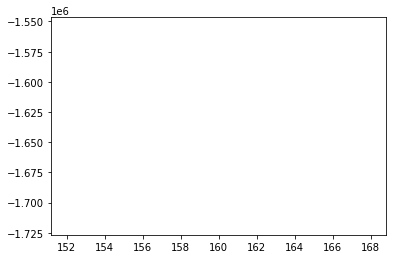

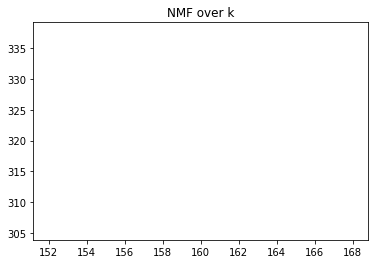

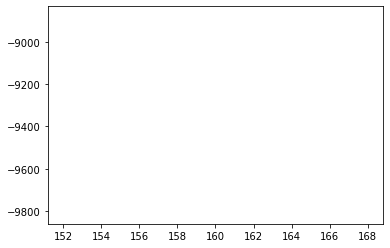

Max iter reached
MIN AIC = -1579028.4943055413 id : 0


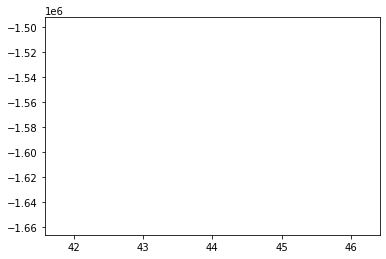

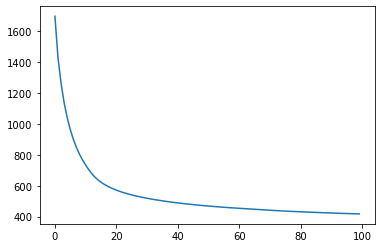

[[2.00564436e-02 2.57375314e-05 9.73118495e-03 ... 6.99476057e-03
  7.27458648e-07 1.20496654e-03]
 [1.81448652e-02 5.60855618e-02 7.27021901e-01 ... 5.90012065e-02
  6.50950535e-05 2.88847580e-01]
 [8.41896254e-02 2.09495492e-05 1.71747394e-01 ... 2.80504387e-04
  1.89439085e-02 1.40395137e-01]
 ...
 [7.73984153e-05 6.26463161e-05 8.15828634e-06 ... 2.30277021e-05
  5.21339009e-08 3.00774448e-06]
 [8.16665705e-05 2.21753794e-04 1.15472595e-05 ... 1.50721968e-05
  2.92488819e-06 6.10546113e-06]
 [6.82639903e-05 2.52540990e-04 1.81244929e-06 ... 2.78245023e-05
  2.46204384e-06 2.27603268e-06]]


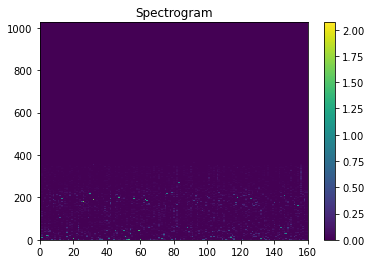

In [3]:
figsize = (10,8)

n_test = 2

tests = {
    0 : "speaker1_husky_noice_1_+20dB",
    1 : "auto_remi_6_husky_1.wav",
    2 : "remi_7_husky_1.wav",
    3 : "auto_remi_7_husky_1_+10dB.wav",
    4 : "auto_remi_7_husky_1_+20dB.wav",
    5 : "auto_remi_7_husky_1_-10dB.wav",
}

def power(signal):
    return sum([pow(s, 2.0) for s in signal]) / len(signal)

AUDIO_NOISE_PATH = "audio/audio_noise/"
NOISE_PATH = "audio/noise/"
AUDIO_PATH = "audio/audio/"
RESULTS_PATH = "results/"

test = tests[n_test]

if test == "speaker1_husky_noice_1_+20dB":
    file_an = "speaker1_husky_noise_1.wav"
    file_a = "speaker1.wav"
    file_n = "husky_noise_1_+20dB.wav"

elif test == "auto_remi_6_husky_1.wav":
    file_an = "auto_remi_6_husky_1.wav"
    file_a = "remi_6.wav"
    file_n = "husky_noise_1.wav"

elif test == "remi_7_husky_1.wav":
    file_an = "remi_7_husky_1.wav"
    file_a = "remi_7.wav"
    file_n = "husky_noise_1.wav"

elif test == "auto_remi_7_husky_1_+10dB.wav":
    file_an = "auto_remi_7_husky_1_+10dB.wav"
    file_a = "remi_7.wav"
    file_n = "husky_noise_1_+10dB.wav"

elif test == "auto_remi_7_husky_1_-10dB.wav":
    file_an = "auto_remi_7_husky_1_-10dB.wav"
    file_a = "remi_7.wav"
    file_n = "husky_noise_1_-10dB.wav"

elif test == "auto_remi_7_husky_1_+20dB.wav":
    file_an = "auto_remi_7_husky_1_+20dB.wav"
    file_a = "remi_7.wav"
    file_n = "husky_noise_1_+20dB.wav"

(fe_an, signal_an) = scipy.io.wavfile.read(AUDIO_NOISE_PATH + file_an)
(fe_a, signal_a) = scipy.io.wavfile.read(AUDIO_PATH + file_a)
(fe_n, signal_n) = scipy.io.wavfile.read(NOISE_PATH + file_n)

print(len(signal_an), len(signal_a), len(signal_n))

nperseg = 2048
_, _, Zxx_an = scipy.signal.stft(signal_an, fe_an, nperseg=nperseg)
_, _, Zxx_n = scipy.signal.stft(signal_n, fe_n, nperseg=nperseg)
print(Zxx_an.shape)
print("SNR =", np.log(power(signal_a) / power(signal_n)) * 10)

n_components = 50
W1, _ = NMF(abs(Zxx_n), n_components=n_components, max_iter=100, err=1)
print(W1.shape)

AICs = []
xs = np.arange(400, 401)

N = Zxx_n.shape[1] * Zxx_n.shape[0]
print(np.min(Zxx_n))

NMFs = []
NMFs_sum = []
for n_components in xs:
    W, H = NMF(np.absolute(Zxx_n), n_components=n_components, max_iter=100, err=0.1)
    """
    model_train = sklearn.decomposition.NMF(n_components=n_components, init='random', random_state=0, max_iter=10000)
    W = model_train.fit_transform(abs(Zxx_n))
    H = model_train.components_
    """
    # AICs.append(2 * n_components + N * np.log(np.linalg.norm(Zxx_n - W @ H) / np.linalg.norm(Zxx_n) / N))
    # AICs.append(2 * n_components - 2 * MLE(abs(Zxx_n), W @ H))
    # AICs.append(2 * n_components + N * (np.log(2 * np.pi) + 1) + N * np.log(pow(np.linalg.norm(abs(Zxx_n) - W @ H), 2)  / N))
    AICs.append(2 * n_components * (Zxx_n.shape[0] + Zxx_n.shape[1] - 1) + N * np.log(pow(np.linalg.norm(np.absolute(Zxx_n) - W @ H), 2.0)  / N))
    # AICs.append(2 * n_components + N * np.log(pow(np.linalg.norm(Zxx_n - W @ H), 2)  / pow(np.linalg.norm(Zxx_n), 2)))
    print(str(n_components) + " " + str(AICs[-1]))
    NMFs_sum.append(np.sum(abs(Zxx_n) - W @ H))
    NMFs.append(np.linalg.norm(abs(Zxx_n) - W @ H))

print("MIN AIC = " + str(np.min(AICs)) + " id : " + str(np.argmin(AICs)))
plt.figure()
plt.plot(xs, AICs)
plt.show()

plt.figure()
plt.title("NMF over k")
plt.plot(xs, NMFs)
plt.show()

plt.figure()
plt.plot(xs, NMFs_sum)
plt.show()

AICs = []
xs = np.arange(44, 45)

N = Zxx_an.shape[1] * Zxx_an.shape[0]

for n_components in xs:
    # W1, H1, W2, H2, ress = SSNMF(abs(Zxx_an), W, n_components=n_components, max_iter=100, err=0.1)
    W1, H1, W2, H2, ress = KL_SSNMF(abs(Zxx_an), W1, n_components=n_components, max_iter=100, err=0.001, mu=mu)
    # AICs.append(2 * n_components + N * np.log(np.linalg.norm(Zxx_an - (W1 @ H1 + W2 @ H2)) / np.linalg.norm(Zxx_an) / N))
    # AICs.append(2 * n_components - 2 * MLE(abs(Zxx_an), W1 @ H1 + W2 @ H2))
    #AICs.append(2 * n_components + N * (np.log(2 * np.pi) + 1) + N * np.log(pow(np.linalg.norm(abs(Zxx_n) - (W1 @ H1 + W2 @ H2)), 2)  / N))
    AICs.append(2 * n_components * (Zxx_an.shape[0] + Zxx_an.shape[1] - 1) + N * np.log(pow(np.linalg.norm(abs(Zxx_an) - (W1 @ H1 + W2 @ H2)), 2.0)  / N))
    # AICs.append(2 * n_components + N * np.log(pow(np.linalg.norm(Zxx_n -(W1 @ H1 + W2 @ H2)), 2)  / pow(np.linalg.norm(Zxx_n), 2)))

print("MIN AIC = " + str(np.min(AICs)) + " id : " + str(np.argmin(AICs)))
plt.figure()
plt.plot(xs, AICs)
plt.show()


plt.figure()
plt.plot(ress)
plt.show()

print(W1)

plt.figure()
plt.title("Spectrogram")
plt.pcolormesh(W1)
plt.colorbar()
plt.show()